In [ ]:
<div style="display:fill;
            border-radius:15px;
            background-color:#9db1f8;
            font-size:210%;
            font-family:sans-serif;
            letter-spacing:0.5px;
            padding:10px;
            color:white;
            border-style: solid;
            border-color: black;
            text-align:center;">
<b>
 🏎️🏎️ Car Purchase Prediction 🚗🚗

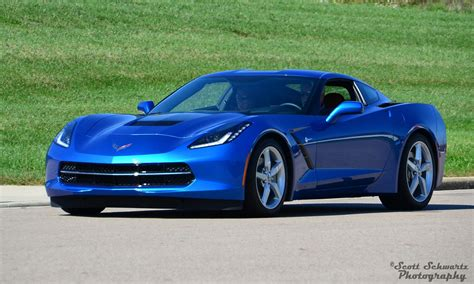


# <b>1 <span style='color:#9db1f8'>|</span> Importing Libraries and Loading dataset</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#9db1f8','#217a36','#47bc8f','#947efd','#a4d835']
sns.set_palette(sns.color_palette(colors))

In [3]:
df = pd.read_csv("car_data.csv")
df.sample(10)

,User ID,Gender,Age,AnnualSalary,Purchased
972,440,Male,63,85500,1
53,445,Female,23,56500,0
627,632,Female,18,86000,0
984,649,Female,28,87000,0
280,633,Male,47,43000,0
342,487,Female,48,51500,1
839,589,Male,35,38000,0
797,923,Female,38,74500,0
402,808,Male,25,85500,0
610,195,Female,52,135500,0


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | About the dataset</b></p>
</div>

This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries.

* Columns:
* User ID
* Gender
* Age
* Annual Salary
* Purchase Decision (No = 0; Yes = 1)

# <b>2 <span style='color:#9db1f8'>|</span> Understanding Our Data</b>

In [6]:
#What is the shape of the dataset?
df.shape

(1000, 5)

In [5]:
#Some info about our attributes and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [7]:
#Some analysis on the numerical columns
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


**Observations**
> * **User ID** - Should drop this column as it won't help the model.
> * **Age** - **Minimum** - 18 years , **Maximum** - 63 years , **Mean is nearly equal to Median - Normal distribution expected!**
> * **AnnualSalary** - **Minimum** - 15000 , **Maximum** - 152500

In [8]:
#Check for null values
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

**There are no null values in our dataset!**

In [10]:
#Check for duplicates in the dataset
df.duplicated().sum()

0

**There are no duplicates in our dataset!**

# <b>3 <span style='color:#9db1f8'>|</span> Exploratory Data Analysis</b>

#### Dropping the User ID column from our dataset as these are just numbers ranging from 1-1000

In [11]:
df_drop = df.drop(columns='User ID')

df_drop

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Visualizing Continuous Columns</b></p>
</div>

Text(0.5, 0.98, 'Visualizing Continuous Columns')

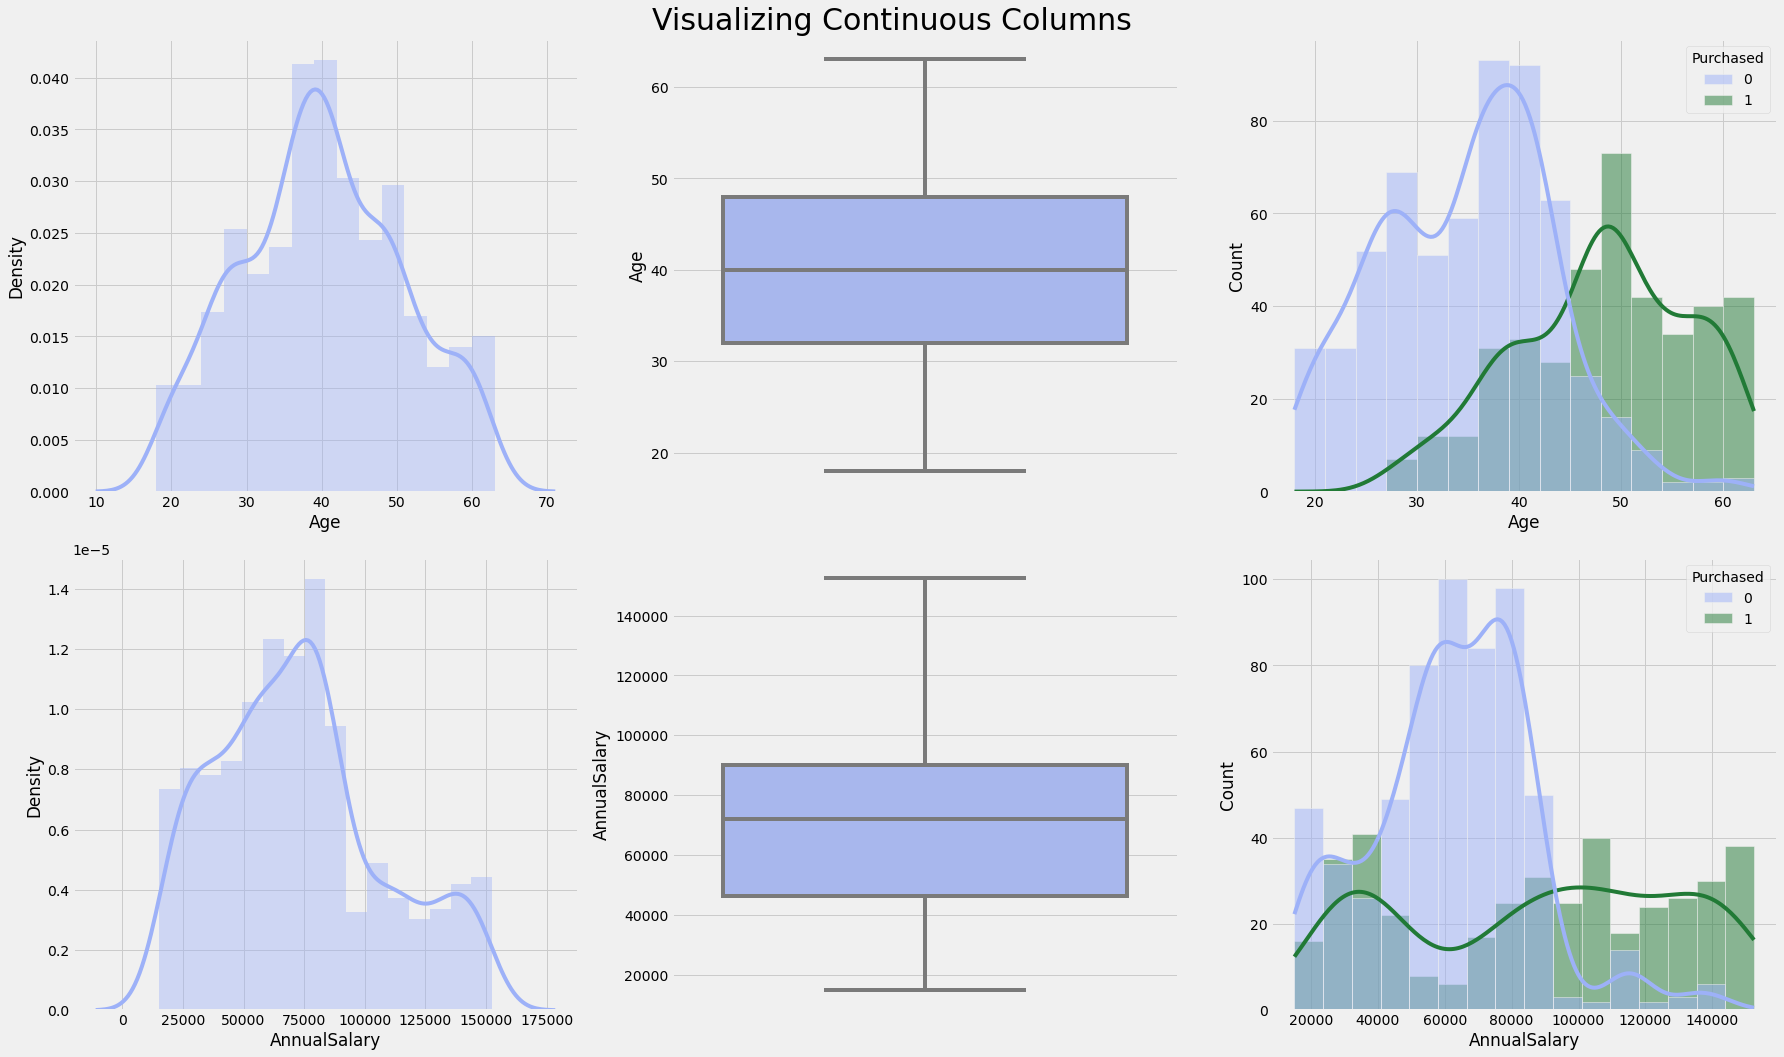

In [12]:
import warnings
warnings.filterwarnings('ignore')

fig,ax=plt.subplots(2,3,figsize=(25,15))
sns.distplot(df['Age'],ax=ax[0,0])
sns.boxplot(y=df['Age'],ax=ax[0,1])
sns.histplot(data=df,x='Age',ax=ax[0,2],hue='Purchased',kde=True)

sns.distplot(df['AnnualSalary'],ax=ax[1,0])
sns.boxplot(y=df['AnnualSalary'],ax=ax[1,1])
sns.histplot(data=df,x='AnnualSalary',ax=ax[1,2],hue='Purchased',kde=True)
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=30)

**Observations**
> **Age** 
>> * **No outliers** present in the dataset.
>> * **Normally Distributed**.People of **Age>45 usually tend to Purchase the car**.

>**AnnualSalary** 
>>* **No Outliers** present in the dataset.
>>* **Bit Right skewed**. **People tend to buy Car regardless of their annual Salary.Although people with salary range - 40k to 85k tend not to purchase the Car.**

<AxesSubplot:xlabel='Gender', ylabel='count'>

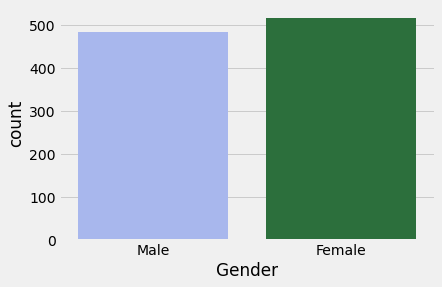

In [13]:
sns.countplot(data=df,x='Gender')

**Observations:**
> The dataset contains more samples with Female candidates.

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Visualizing Class Imbalance</b></p>
</div>

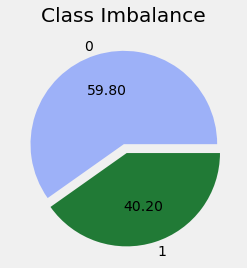

In [14]:
plt.pie(df['Purchased'].value_counts(),labels=df['Purchased'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Class Imbalance")
plt.show()

**Observations:**
> A **slight imbalance** in between the classes is observed. Where samples where Car was not purchases were higher in number.

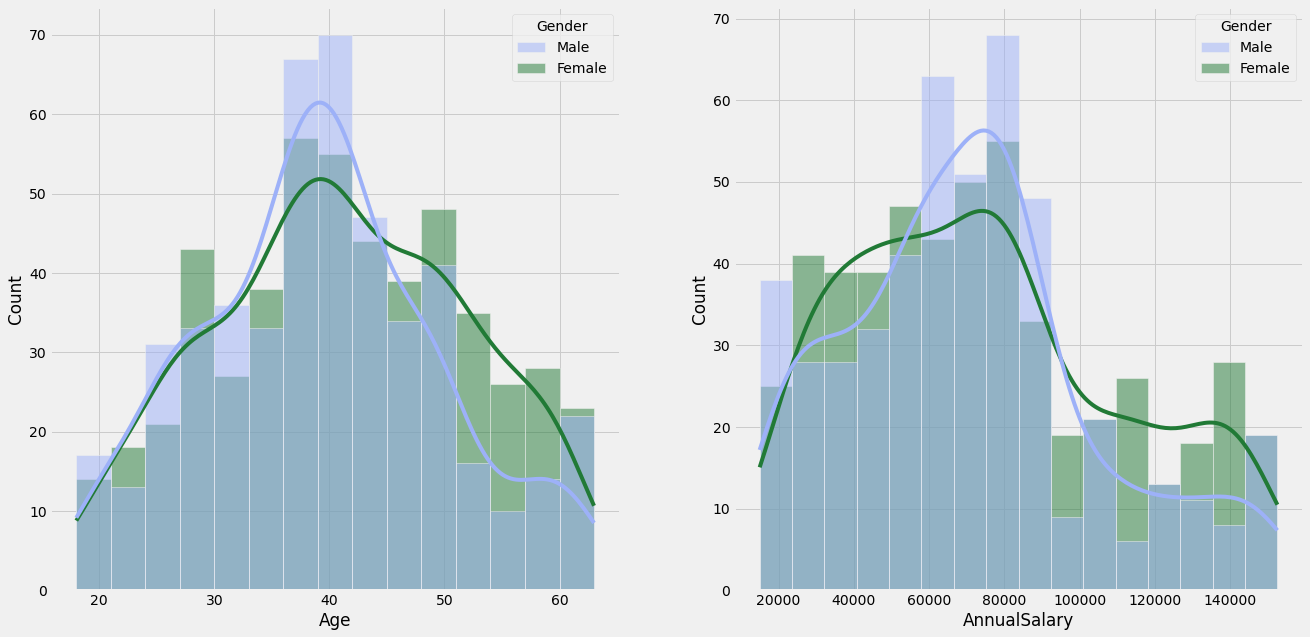

In [15]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.histplot(data=df,x='Age',ax=ax[0],hue='Gender',kde=True)
sns.histplot(data=df,x='AnnualSalary',ax=ax[1],hue='Gender',kde=True)

plt.show()

**Observations**
> Both Age and AnnualSalary have same properties irrespective of Gender

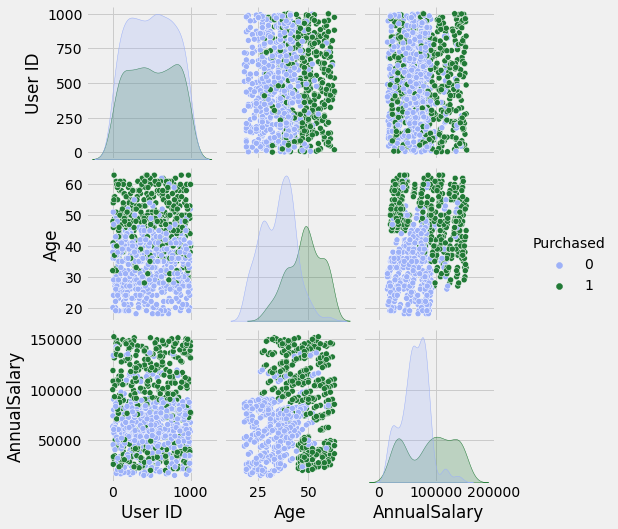

In [16]:
sns.pairplot(df,hue='Purchased')
plt.show()

<AxesSubplot:>

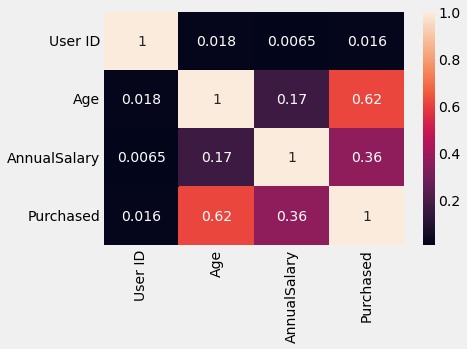

In [17]:
sns.heatmap(df.corr(),annot=True)

**Observations:**
> Positive Correaltion is seen between Age and Purchased as observed from the graphs.

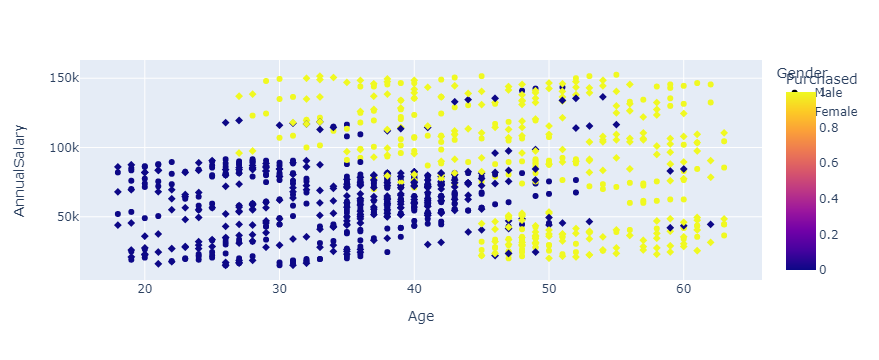

In [20]:
import plotly.express as px
fig = px.scatter(df, x='Age', y='AnnualSalary',color='Purchased',symbol='Gender')
fig.show()

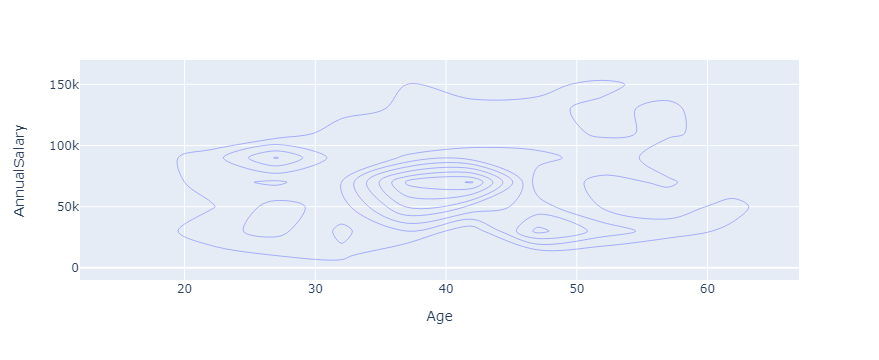

In [22]:
fig = px.density_contour(df, x='Age', y='AnnualSalary')
fig.show()

# <b>4 <span style='color:#9db1f8'>|</span> Data Preprocessing</b>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | ColumnTransformer</b></p>
</div>

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn import set_config
set_config(display='diagram')
transformer = ColumnTransformer(transformers=[('Encoder',OneHotEncoder(drop='first',sparse=False),['Gender']),('Yeo-Johnson',PowerTransformer(),['Age','AnnualSalary'])])

In [26]:
transformer

ColumnTransformer(transformers=[('Encoder',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Gender']),
                                ('Yeo-Johnson', PowerTransformer(),
                                 ['Age', 'AnnualSalary'])])

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Splitting of Train and Test Set</b></p>
</div>

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Purchased'],axis=1),df['Purchased'],random_state=42,stratify=df['Purchased'],shuffle=True)

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Transforming Data</b></p>
</div>

In [29]:
X_train=transformer.fit_transform(X_train)

In [30]:
X_test=transformer.transform(X_test)

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | OverSampling of Minority Class using SMOTE</b></p>
</div>

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test,y_test = sm.fit_resample(X_test,y_test)

ModuleNotFoundError: No module named 'imblearn'

# <b>5 <span style='color:#9db1f8'>|</span> Model Building</b>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNearest Neighbor - 91%</b></p>
</div>

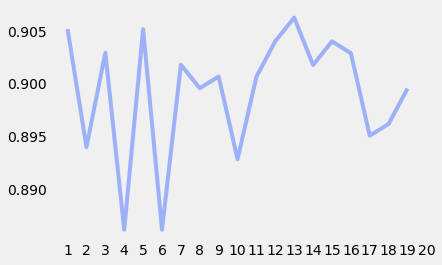

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



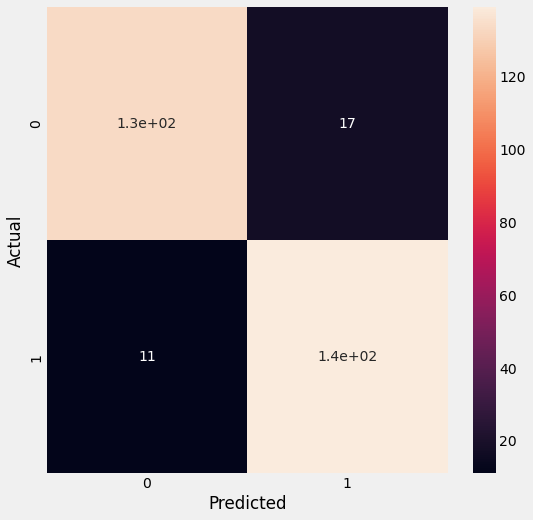

In [23]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Support Vector Classifier - 93% </b></p>
</div>

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       150
           1       0.93      0.92      0.93       150

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300


Best Parameters of SVC model is : {'kernel': 'rbf', 'gamma': 1, 'C': 100}



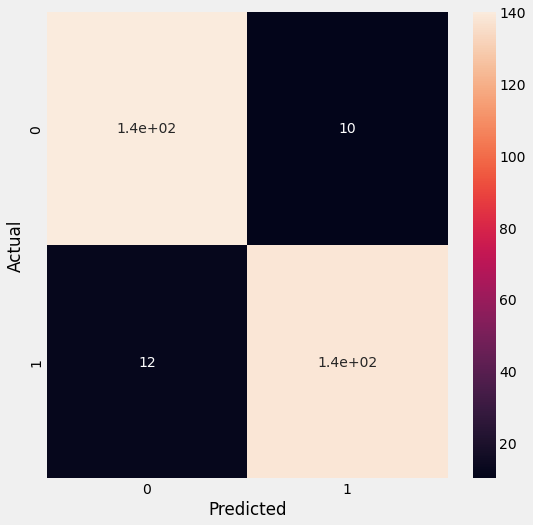

In [24]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf','poly']}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Logistic Regression - 84%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       150
           1       0.83      0.85      0.84       150

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



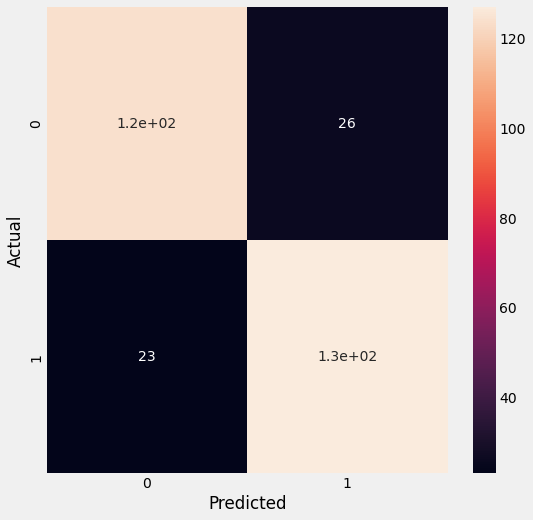

In [25]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Random Forest Classifier - 92%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.90      0.94      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


Best Parameter: {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'gini'}



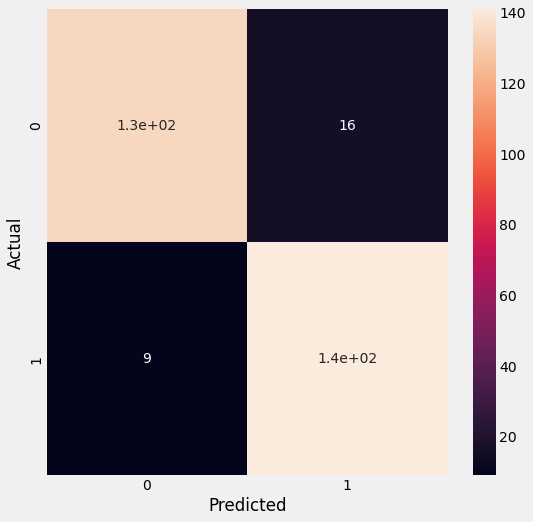

In [30]:
param_grid = {
    'n_estimators': [50, 75,100, 150, 200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,16],
    'criterion' :['gini', 'entropy']
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Gradient Boosting Classifier - 92%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       150
           1       0.91      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


Best Parameter: {'n_estimators': 50, 'learning_rate': 0.05}



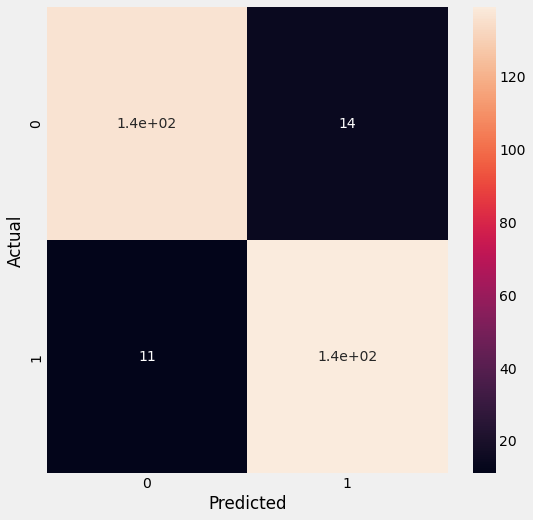

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | LGBM Classifier - 91%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       150
           1       0.90      0.92      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



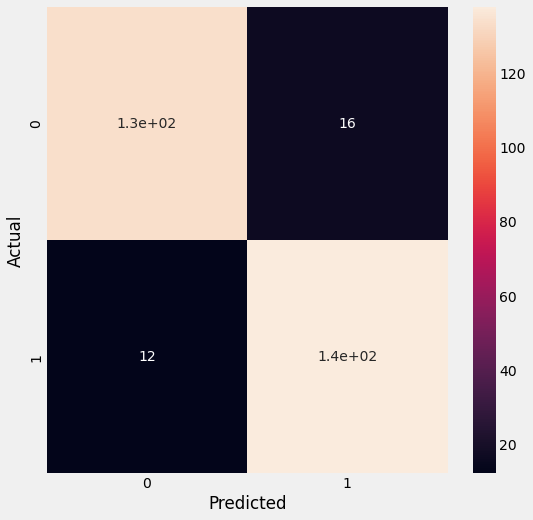

In [28]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Voting Classifier - 93%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       150
           1       0.92      0.94      0.93       150

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



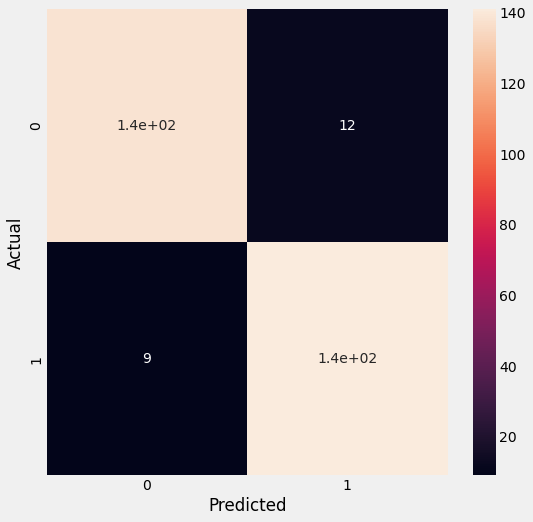

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
estimator = []
estimator.append(('RFC', 
                   RandomForestClassifier(n_estimators= 300, max_features= 'log2', max_depth= 8)))
estimator.append(('SVC', SVC(kernel='rbf', gamma= 1, C=100)))
estimator.append(('GBC', GradientBoostingClassifier(n_estimators = 50, learning_rate =0.05)))
            
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train,y_train)
y_pred= vot_hard.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#947efd;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Selected Model - Voting Classifier</b></p>
</div>

# <b>6 <span style='color:#9db1f8'>|</span> Future Aspects</b>


Although the dataset is really small. Still would try out some other combinations of feature engineering steps. 

### If you liked this notebook, Do give an Upvote! Thank You!

In [5]:
number = input("Enter your Number: ")
mynumber = int(number)
if (mynumber%2)>0:
    print("The number input is " + number + ", and the number is Odd Number")
else:
    print("The number input is " + number + ", and the number is Even Number")

Enter your Number:  100


The number input is 100, and the number is Even Number
